# <p style="text-align:center;">**Airbnb Listings Bangkok Analysis**</p>
<img src="airbnb_logo_2.png" style="display:block; margin-left:auto; margin-right:auto; width:600px;"/>

---

# **Business Understanding**

### **LATAR BELAKANG**
<p style="text-align:justify;"> Airbnb adalah sebuah platform daring yang memfasilitasi pemilik properti untuk menyewakan ruang mereka kepada wisatawan atau pengunjung yang membutuhkan akomodasi sementara. Platform ini telah mengubah cara orang mencari tempat menginap, memudahkan proses pemesanan, dan menyediakan berbagai pilihan akomodasi yang lebih beragam daripada hotel tradisional. Pemilik properti dapat memasarkan rumah, apartemen, kamar, atau bahkan ruang unik lainnya kepada tamu dari seluruh dunia. Data yang tersedia di Airbnb untuk wilayah tertentu, seperti Bangkok, Thailand, mencakup informasi rinci tentang setiap listing yang terdaftar. Setiap baris dalam data tersebut menggambarkan satu unit akomodasi, sementara kolom-kolomnya menyajikan informasi penting seperti harga per malam, jenis properti, fasilitas yang ditawarkan, lokasi, rating tamu, dan banyak lagi. Hal ini memungkinkan calon tamu untuk membuat pilihan yang lebih informasional dan sesuai dengan kebutuhan mereka selama perjalanan.


### **RUMUSAN DAN TUJUAN MASALAH**
<p style="text-align:justify;"> Airbnb ingin menganalisis listings yang berada di Bangkok untuk memahami lebih baik distribusi kamar dan kecocokan jenis akomodasi dengan preferensi konsumen di berbagai wilayah. Masalah yang dihadapi perusahaan adalah ketidaksesuaian antara persebaran kamar yang dimiliki dengan karakteristik wilayah di Bangkok. Variasi jenis kamar yang tidak tepat sesuai dengan kebutuhan dan keinginan pelanggan di setiap area dapat menghambat kemampuan Airbnb dalam memenuhi permintaan secara efisien. Hal ini berisiko mengurangi daya tarik perusahaan di pasar dan berpotensi mengurangi peluang untuk meningkatkan penjualan serta menarik lebih banyak tamu.Analisis ini bisa dijadikan dasar untuk ekspansi dan meningkatkan penjualan di tahun berikutnya. Informasi ini akan membantu tim Sales & Marketing AirBnB dalam menentukan lokasi yang strategis serta memperbaiki kualitas listing di setiap area. Oleh karena itu, fokus analisis sebaiknya pada:

1. Di wilayah mana terdapat jumlah listing terbanyak? Apa karakteristik khusus dari wilayah tersebut yang membuatnya diminati oleh pengguna? Hal ini dapat membantu Airbnb dalam mengarahkan upaya pemasaran dan pengembangan di wilayah yang paling diminati oleh pengguna.

2. Apa distribusi jenis kamar yang tersedia dalam data listing? Bagaimana proporsi masing-masing jenis kamar, seperti "Entire home/apt", "Private room", dan "Shared room"? Hal ini penting untuk memahami preferensi pengguna dan mengoptimalkan portofolio kamar yang ditawarkan.

3. Bagaimana hubungan antara harga dan tingkat penjualan untuk setiap jenis kamar atau wilayah?



# **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisikan informasi tentang lokasi Airbnb tersebut, jenis-jenis room, dan harga dari Airbnb tersebut. Ada 16 kolom di dalam dataset Airbnb Listings Bangkok, yaitu:

| Kolom                                        | Deskripsi                                                        |
|----------------------------------------------|------------------------------------------------------------------|
| `id`                                         | Identifikasi unik Airbnb untuk listing                           |
| `name`                                       | Nama untuk listing yang ada di dalam Airbnb                      |
| `host_id`                                    | Identifikasi unik Airbnb untuk host/owner                        |
| `host_name`                                  | Nama pemilik listing                                             |
| `neighborhood`                               | Lingkungan atau region tempat listing berada                     |
| `latitude`                                   | Koordinat lintang lokasi                                         |
| `longitude`                                  | Koordinat bujur lokasi                                           |
| `room_type`                                  | Tipe kamar yang tersedia untuk listing                           |
| `price`                                      | Harga listing yang telah terdaftar                               | 
| `minimum_nights`                             | Jumlah minimum malam yang diperlukan untuk memesan listing       |
| `number_of_reviews`                          | Jumlah total ulasan yang diterima oleh listing                   |
| `last_review`                                | Tanggal ulasan terakhir untuk listing                            |
| `reviews_per_month`                          | Jumlah rata-rata ulasan yang diterima oleh listing per bulan     |
| `calculated_host_listings_count`             | Jumlah semua listing yang dimiliki oleh owner                    |
| `availability_365`                           | Ketersediaan listing dalam 365 hari ke depan                     |
| `number_of_reviews_ltm`                      | Jumlah ulasan yang diterima oleh listing dalam 12 bulan terakhir |

In [2]:
# Menampilkan Semua Kolom
pd.options.display.max_columns=None

# Melihat dataset
df = pd.read_csv("Airbnb Listings Bangkok.csv")
display(df.head(5))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## **Data Checking**
Pada bagian ini akan dilakukan pengecekan keselurahan yang ada pada dataset seperti pengecekan missing value, duplicate, outliers dan bagaimana cara untuk mengatasi masalah tersebut

In [3]:
# Cek Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Dari ringkasan informasi diatas dapat dilihat jumlah data pada kolom `name`, `host_name`, `last_review`, dan `reviews_per_month` tidak sesuai dengan jumlah data pada kolom lainnya yang menyatakan bahwa kolom tersebut memiliki missing value

### **Cek Duplikat**
Mengecek data duplikat yang ada pada dataset

In [4]:
# Cek duplikat
df.duplicated().sum()


np.int64(0)

Dari pengecekan diatas didapatkan bahwa pada dataset Airbnb ini tidak memiliki data yang duplikat

### **Cek Total Unique dan Unique Value**

In [5]:
# Cek unique dari setiap kolom
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique(df):
    df_unique = pd.DataFrame()
    df_unique["Kolom"] = df.columns
    df_unique["Total Unique"] = [df[col].nunique() for col in (df.columns)]
    df_unique["Unique Value"] = [df[col].unique()[:4] for col in (df.columns)]
    return df_unique

unique(df)

,Kolom,Total Unique,Unique Value
0,Unnamed: 0,15854,"[0, 1, 2, 3]"
1,id,15854,"[27934, 27979, 28745, 35780]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3]"
3,host_id,6659,"[120437, 120541, 123784, 153730]"
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak]"
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng]"
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823]"
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256]"
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
9,price,3040,"[1905, 1316, 800, 1286]"


### **Insight**
Dapat disimpulkan dari pengecekan diatas bahwa:
* Dataset ini memiliki 15854 baris dan 16 kolom
* Berdasarkan informasi dari data diatas, data type pada kolom `last_review` tipe datanya masih tidak sesuai dengan value dari kolom tersebut yang dimana tipe kolom `last_review ` seharusnya datetime.
* Dataset ini masih memiliki missing value pada beberap kolom yaitu `name`, `host_name`, `last_review`, `reviews_per_month`
* Tidak ada data duplikat pada dataset ini


## **Missing Value**

### **Cek Missing Value**

Cek jumlah missing value pada tiap kolom

In [6]:
# Cek missing value
missing_value = pd.DataFrame({
    'Jumlah Missing': df.isna().sum(),
    'Persentase Missing': (df.isna().sum() / len(df)) * 100})
missing_value

,Jumlah Missing,Persentase Missing
Unnamed: 0,0,0.000000
id,0,0.000000
name,8,0.050460
host_id,0,0.000000
host_name,1,0.006308
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


<Axes: >

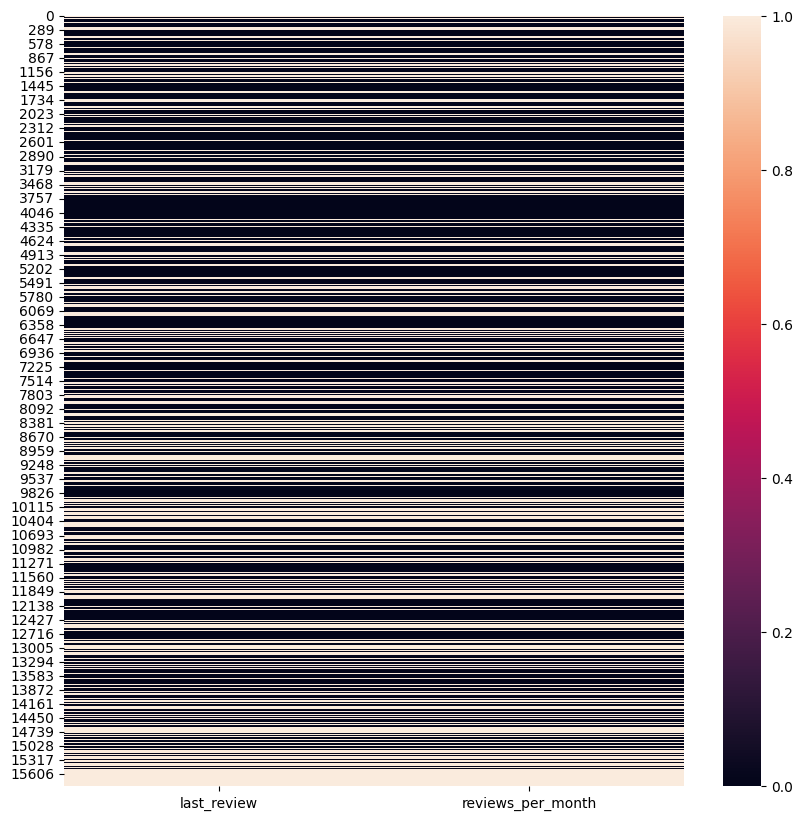

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['last_review','reviews_per_month']].isna())

### **Insight**
Berdasarkan informasi diatas dapat diketahui bahwa:
* Persentase nilai yang hilang pada kolom `name` dan `host_name` berada di bawah atau sama dengan 0,5%.

* Didapatkan hubungan pada kolom `last_review` dengan `reviews_per_month` yang dimana jika kolom `last_review` terdapat missing value maka kolom `reviews_per_month` juga akan memiliki missing value.

### **How to Handle**
Dari pengecekan missing value diatas, dinyatakan bahwa:
* Persentase missing value < 0.5% maka akan dilakukan drop pada baris yang memiliki missing value

* Persentase missing value > 0.5% maka akan dilakukan drop pada kolom yang memiliki missing value

In [8]:
# Drop baris pada kolom name dan host_name
df.dropna(subset=['name','host_name'],inplace=True)

In [9]:
# Missing value pada kolom reviews_per_month diisi dengan angka 0
df['reviews_per_month'].fillna(0, inplace=True)

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
# Drop kolom last_review
df.drop('last_review',axis=1,inplace=True)

In [12]:
df['price'] = df['price'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15845 non-null  int64  
 1   name                            15845 non-null  object 
 2   host_id                         15845 non-null  int64  
 3   host_name                       15845 non-null  object 
 4   neighbourhood                   15845 non-null  object 
 5   latitude                        15845 non-null  float64
 6   longitude                       15845 non-null  float64
 7   room_type                       15845 non-null  object 
 8   price                           15845 non-null  float64
 9   minimum_nights                  15845 non-null  int64  
 10  number_of_reviews               15845 non-null  int64  
 11  reviews_per_month               15845 non-null  float64
 12  calculated_host_listings_count  15845

In [14]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Kesimpulan**
Baris dengan nilai kosong pada kolom `name` dan `host_name` akan dihapus, sedangkan kolom `last_review` akan dihapus sepenuhnya karena persentase nilai yang hilang terlalu tinggi sehingga tidak dapat digunakan dalam analisis. Sementara itu, kolom `reviews_per_month` akan tetap dipertahankan dengan mengisi nilai kosong menggunakan angka 0, yang merepresentasikan tidak adanya ulasan per bulan.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15845 non-null  int64  
 1   name                            15845 non-null  object 
 2   host_id                         15845 non-null  int64  
 3   host_name                       15845 non-null  object 
 4   neighbourhood                   15845 non-null  object 
 5   latitude                        15845 non-null  float64
 6   longitude                       15845 non-null  float64
 7   room_type                       15845 non-null  object 
 8   price                           15845 non-null  float64
 9   minimum_nights                  15845 non-null  int64  
 10  number_of_reviews               15845 non-null  int64  
 11  reviews_per_month               15845 non-null  float64
 12  calculated_host_listings_count  15845

### **Cek Outliers**

Text(0, 0.5, 'Harga')

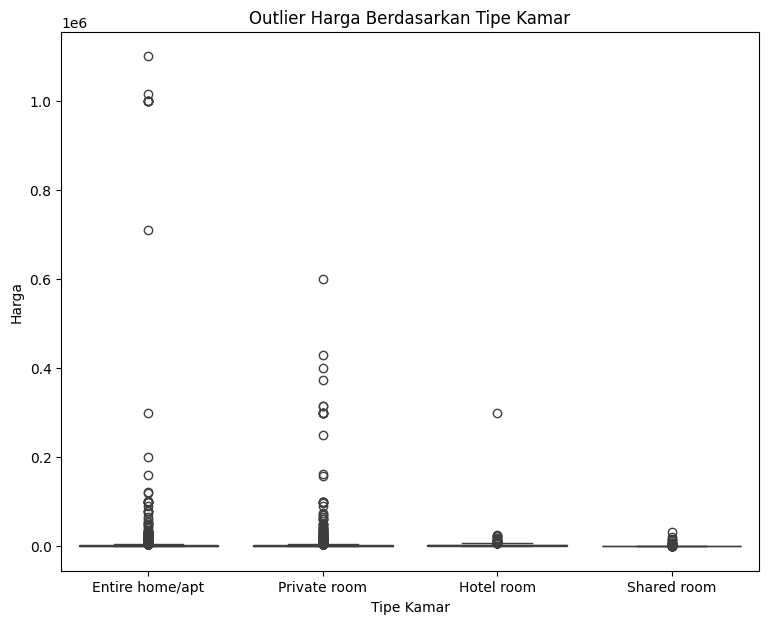

In [16]:
plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Outlier Harga Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

In [17]:
# Cek Kolom Price
def price_roomtype(df):
    price_room = df.groupby('room_type')['price'].agg(['max', 'min']).reset_index()
    price_room.rename(columns={'room_type': 'Room_Type', 'max': 'Highest Price', 'min': 'Lowest Price'}, inplace=True)
    return price_room

price_roomtype(df)

,Room_Type,Highest Price,Lowest Price
0,Entire home/apt,1100000.0,332.0
1,Hotel room,300000.0,0.0
2,Private room,600700.0,278.0
3,Shared room,31200.0,280.0


In [18]:
df.drop(df[(df['room_type'] == 'Hotel room') & (df['price'] == 0)].index, inplace=True)

Terdapat outliers di room type entire home/apt dengan harga yang cukup tinggi dan juga ada yang memang sudah mempunyai review. Disini asumsi nya berhak saja host memberi harga pada unit mereka dengan harga tinggi dengan bukti listing mereka juga sudah pernah ada yang memesan, jadi tidak perlu ada tindakan yang diambil karena ini adalah valid. Sedangkan untuk outliers di Hotel room dengan harga 0 akan di drop dikarenakan listings dari Airbnb harus memiliki harga dan tidak gratis.

## **Making a New Colum**

### **Buat Kategori Baru untuk District**

Bangkok memiliki 50 district sesuai dengan yang dimiliki pada dataset, district tersebut kemudian akan di kelompokkan berdasarkan posisi geografisnya. Pembagiannya dibagi menjadi 6 kelompok yaitu:
* Central Bangkok

* Eastern Bangkok

* Southern Bangkok

* Northern Bangkok 

* North Western Bangkok

* South Western Bangkok

Tujuan dari pengelompokkan diatas adalah untuk mempermudah analisis kedepannya

In [19]:
df['City'] = "Bangkok"

In [20]:
Total_district = pd.DataFrame({
    'City' : df['City'].unique(),
    'Total_District' : df["neighbourhood"].nunique()
})
Total_district


,City,Total_District
0,Bangkok,50


In [21]:
district = pd.DataFrame({
    'District' : df['neighbourhood'].unique()
})
district

,District
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho laen
5,Rat Burana
6,Chatu Chak
7,Khlong San
8,Bang Rak
9,Phaya Thai


In [22]:
def district_category(neighbourhood):
    if neighbourhood in [
        "Dusit", "Phaya Thai", "Wang Thong Lang", "Huai Khwang", 
        "Din Daeng", "Phra Nakhon", "Samphanthawong", "Pom Prap Sattru Phai",
        "Ratchathewi"
    ]:
        return 'Central'
    
    elif neighbourhood in [
       "Bang Na", "Suanluang", "Vadhana", "Yan na wa", "Bang Kho laen",
       "Sathon", "Bang Rak", "Parthum Wan", "Phra Khanong", "Khlong Toei"
    ]:
        return 'Southern'
    
    elif neighbourhood in [
        "Lat Krabang", "Bang Kapi","Khan Na Yao", "Saphan Sung", 
        "Bueng Kum", "Min Buri", "Nong Chok","Khlong Sam Wa", "Pra Wet"
    ]:
        return 'Eastern'
    
    elif neighbourhood in [
        "Chatu Chak", "Lat Phrao", "Bang Khen", 
        "Don Mueang", "Lak Si", "Bang Sue", "Sai Mai"
    ]:
        return 'Northern'
    
    elif neighbourhood in [
        "Thon buri", "Khlong San", "Bangkok Yai", "Bangkok Noi", 
        "Bang Phlat", "Taling Chan", "Chom Thong", "Thawi Watthana"
    ]:
        return 'North Western'
    
    elif neighbourhood in [
        "Phasi Charoen", "Bang Khae", "Nong Khaem", "Bang Bon", 
        "Rat Burana", "Bang Khun thain", "Thung khru"
    ]:
        return 'South Western'
  
df['Area'] = df['neighbourhood'].apply(district_category)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15844 non-null  int64  
 1   name                            15844 non-null  object 
 2   host_id                         15844 non-null  int64  
 3   host_name                       15844 non-null  object 
 4   neighbourhood                   15844 non-null  object 
 5   latitude                        15844 non-null  float64
 6   longitude                       15844 non-null  float64
 7   room_type                       15844 non-null  object 
 8   price                           15844 non-null  float64
 9   minimum_nights                  15844 non-null  int64  
 10  number_of_reviews               15844 non-null  int64  
 11  reviews_per_month               15844 non-null  float64
 12  calculated_host_listings_count  15844

In [24]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
City                              0
Area                              0
dtype: int64

In [25]:
df.to_excel("Airbnb Cleaned.xlsx")

# **Analysis**

## **Analisis Area**

Menurut informasi yang tersedia dari [Bangkok District](http://apps.bangkok.go.th/info_gidsedbkk/m.info/bkkstat/stat_2559_eng.pdf), distrik-distrik di Kota Bangkok dapat diklasifikasikan ke dalam enam kategori utama: Central, Southern, Northern, Eastern, North Western, dan South Western. Pembagian ini bertujuan untuk menciptakan struktur yang lebih sistematis, sehingga analisis dan pengolahan data dapat dilakukan dengan lebih mudah.

In [27]:
Jumlah_listings_neighbourhood = pd.DataFrame({
   'Total' : df['neighbourhood'].value_counts()
})

Jumlah_listings_neighbourhood


,Total
neighbourhood,
Vadhana,2150
Khlong Toei,2096
Huai Khwang,1125
Ratchathewi,1113
Bang Rak,827
Sathon,809
Phra Nakhon,619
Phra Khanong,557
Chatu Chak,548


In [28]:
# groupby listing berdasarkan district
district = df.groupby(['neighbourhood','Area'])[['name']].count().sort_values(by='name',ascending=False).reset_index()

# top
top_5 = district.head()
display(top_5)
bottom_5 = district.tail()
display(bottom_5)



,neighbourhood,Area,name
0,Vadhana,Southern,2150
1,Khlong Toei,Southern,2096
2,Huai Khwang,Central,1125
3,Ratchathewi,Central,1113
4,Bang Rak,Southern,827


,neighbourhood,Area,name
45,Bang Khun thain,South Western,21
46,Nong Chok,Eastern,14
47,Thawi Watthana,North Western,12
48,Nong Khaem,South Western,9
49,Bang Bon,South Western,5


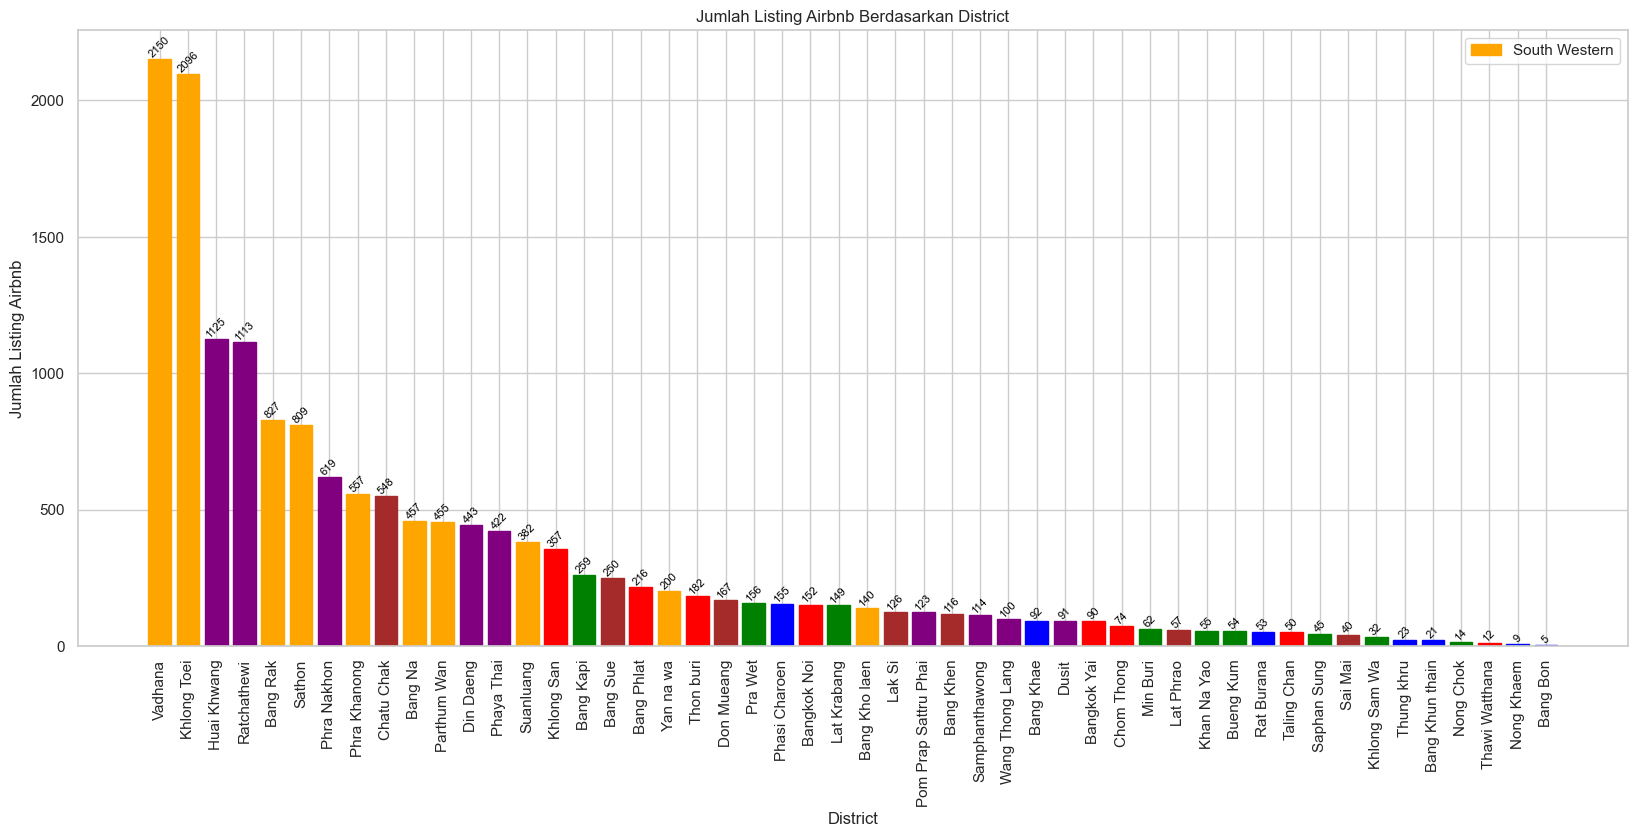

In [47]:
# visualisasi
plt.figure(figsize=(20, 8))
bars = plt.bar(district['neighbourhood'], district['name'])  # Warna default

# Memberikan warna berbeda untuk setiap Label City
label_city_colors = {'South Western': 'blue', 'Eastern': 'green', 'North Western': 'red', 'Central': 'purple', 'Southern': 'orange', 'Northern': 'brown'}
for bar, label_city in zip(bars, district['Area']):
    bar.set_color(label_city_colors.get(label_city, 'gray'))

# Menambahkan label angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', rotation=45, color='black', fontsize=8)

#label
plt.xlabel('District')
plt.ylabel('Jumlah Listing Airbnb')
plt.legend(label_city_colors)
plt.title('Jumlah Listing Airbnb Berdasarkan District')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca

# Menampilkan grafik
plt.show()

In [30]:
Listings_per_area = pd.DataFrame({
   'Total' : df['Area'].value_counts()
})

Listings_per_area

,Total
Area,
Southern,8073
Central,4150
Northern,1304
North Western,1133
Eastern,826
South Western,358


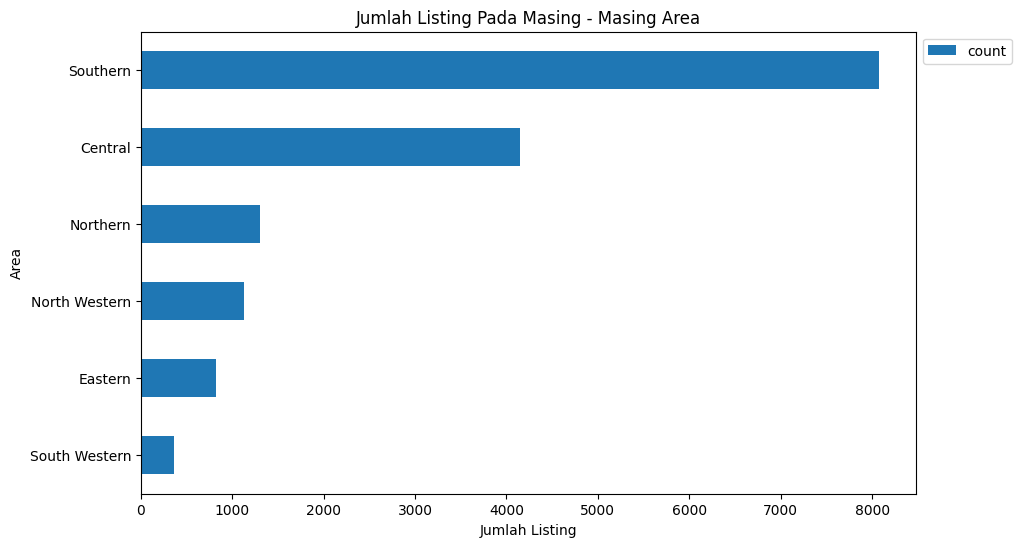

In [31]:
area_counts = df['Area'].value_counts().sort_values(ascending=True)

# Menampilkan proporsi kolom 'area' dalam bentuk stacked bar chart
plt.figure(figsize=(10, 6))
area_counts.plot(kind='barh', stacked=True)
plt.xlabel('Jumlah Listing')
plt.ylabel('Area')
plt.title('Jumlah Listing Pada Masing - Masing Area')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari analisis diatas, dapat disimpulkan bahwa jumlah listing pada wilayah Southern Bangkok lebih tinggi dibandingkan dengan wilayah Central, Northern, Western, Eastren dan wilayah lainnya. Neighbourhood yang memiliki jumlah listing tertinggi pun termasuk dari bagian Southern Bangkok. dan dari hasil research berikut karakteristik masing - masing wilayah di Bangkok :

- Southern Bangkok : Wilayah bagian selatan Bangkok dikenal dengan area pelabuhan dan akses ke pantai. Terdapat beberapa kawasan industri dan pemukiman yang lebih tenang, tetapi juga pusat perbelanjaan dan wisata populer seperti Chinatown yang menawarkan pengalaman budaya yang kaya.

- Central Bangkok : Wilayah bagian tengah Bangkok terdapat pusat bisnis, pusat perbelanjaan, perkantoran dan juga wisata kota serta akses transportasi yang mudah. Layaknya di semua negara, dimana pusat kota menjadi yang terpadat dan memiliki tingkat aktivitas yang tinggi dibanding wilayah lain.

- Northern Bangkok : Wilayah utara Bangkok memiliki banyak area perumahan dan taman kota. Meskipun lebih jauh dari pusat kota, kawasan ini menawarkan suasana yang lebih hijau dan sejuk dengan berbagai taman dan situs bersejarah, serta banyak universitas dan pusat penelitian.

- North Western Bangkok : Bagian barat laut Bangkok dikenal dengan kawasan yang lebih tradisional dan tenang. Terdapat banyak tempat-tempat wisata sejarah, pasar lokal, dan daerah permukiman yang lebih nyaman untuk tinggal. Kawasan ini juga memiliki berbagai taman rekreasi yang cocok untuk keluarga.

- Eastern Bangkok : Wilayah timur Bangkok adalah daerah yang terus berkembang pesat. Di sini terdapat kawasan bisnis baru, pusat hiburan, dan pemukiman yang modern. Wilayah ini juga terkenal dengan pusat perbelanjaan besar seperti Mega Bangna dan akses mudah ke bandara internasional Suvarnabhumi.

- South Western Bangkok : Wilayah barat daya Bangkok sering kali dikenal dengan suasana lebih pedesaan dan santai. Terdapat beberapa pusat perbelanjaan dan hiburan, namun sebagian besar area ini adalah kawasan pemukiman yang lebih tenang, dengan beberapa tempat wisata alam dan sungai yang menambah daya tarik.


## **Analisis Tipe Kamar**

In [32]:
total_room_type = pd.DataFrame({
   'Total' : df['room_type'].value_counts()
})

total_room_type


,Total
room_type,
Entire home/apt,8911
Private room,5762
Hotel room,648
Shared room,523


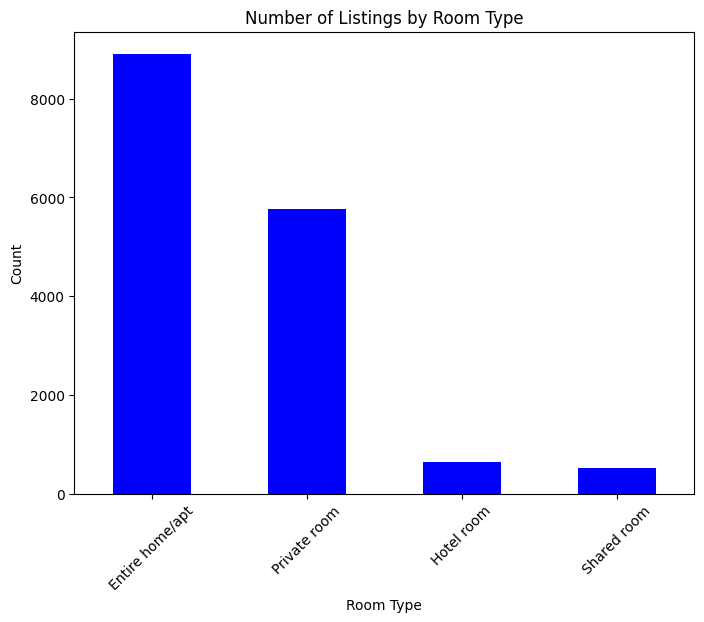

In [33]:
room_type_counts = df['room_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='blue')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.xticks(rotation=45)
plt.show()

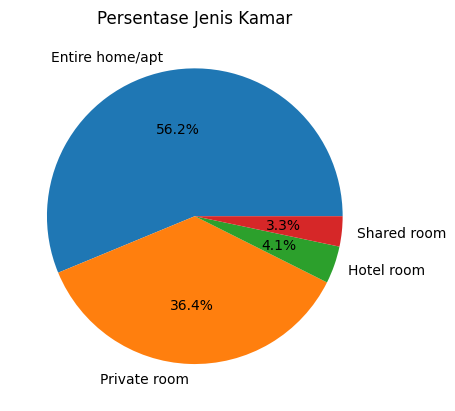

In [34]:
room_type_counts = df['room_type'].value_counts()
room_type_percentages = room_type_counts / len(df) * 100

plt.pie(room_type_percentages, labels=room_type_percentages.index, autopct='%1.1f%%')
plt.title('Persentase Jenis Kamar')
plt.show()

Dapat terlihat bahwa distribusi tipe kamar di keseluruhan data paling banyak adalah Entire home/apt dengan persentase sekitar 56%, diikuti oleh Private room dengan angka 36%. Hal ini menunjukkan bahwa sebagian besar host menawarkan listing dengan tipe Entire home/apt (seluruh rumah atau apartemen), sementara Private room menjadi pilihan kedua terbanyak yang disediakan untuk pelanggan.

Dari keempat jenis kamar berikut adalah deskripsi per masing - masing kamar :

**Entire home/apt (Seluruh Rumah/Apartemen):**

Biasanya disewa untuk periode yang lebih panjang, mulai dari beberapa hari hingga beberapa minggu. Tipe kamar ini sangat cocok untuk tamu yang menginginkan privasi total dan kenyamanan layaknya tinggal di rumah sendiri. Cocok bagi keluarga atau kelompok yang membutuhkan ruang lebih besar dan fasilitas lengkap, termasuk dapur, ruang tamu, dan fasilitas lainnya yang mendukung kenyamanan jangka panjang.

**Private room (Kamar Pribadi):**

Kamar pribadi adalah pilihan populer bagi tamu yang ingin mendapatkan privasi lebih, namun masih berbagi fasilitas umum seperti dapur atau ruang tamu dengan penghuni lainnya. Biasanya cocok untuk tamu yang mencari akomodasi lebih terjangkau tetapi tetap menginginkan ruang pribadi yang nyaman.

**Hotel room (Kamar Hotel):**

Tipe ini mirip dengan akomodasi hotel tradisional, namun sering kali ditawarkan dengan fleksibilitas lebih tinggi dalam hal durasi tinggal dan fasilitas tambahan. Kamar hotel biasanya dilengkapi dengan fasilitas premium dan memberikan pengalaman tinggal yang lebih terstandarisasi serta kenyamanan maksimal.

**Shared room (Kamar Bersama):**

Kamar bersama adalah pilihan yang lebih terjangkau, di mana tamu berbagi ruang dengan tamu lainnya. Biasanya digunakan oleh mereka yang mencari opsi hemat atau berencana untuk menginap dalam jangka pendek. Fasilitas bersama seperti kamar mandi dan dapur akan digunakan oleh beberapa tamu secara bergantian.


Semua tipe kamar memiliki target pasar yang berbeda, dan pilihan tipe kamar tergantung pada kebutuhan dan preferensi penyewa.

In [35]:
cross_tab = pd.crosstab(df['Area'], df['room_type'])
print(cross_tab)

room_type      Entire home/apt  Hotel room  Private room  Shared room
Area                                                                 
Central                   2044         233          1590          283
Eastern                    355          20           426           25
North Western              564          37           502           30
Northern                   611          20           653           20
South Western              180           2           173            3
Southern                  5157         336          2418          162


In [36]:
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")

Chi-square statistic: 706.1343852534909
P-value: 9.159106465146795e-141
Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.


<Figure size 1000x600 with 0 Axes>

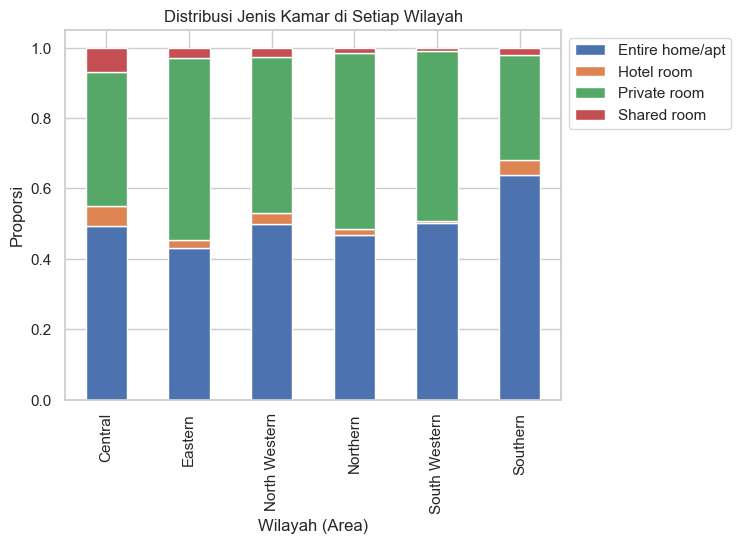

In [37]:
cross_tab = pd.crosstab(df['Area'], df['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah (Area)')
plt.ylabel('Proporsi')
plt.title('Distribusi Jenis Kamar di Setiap Wilayah')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Dilihat dari persebarannya bahwa kamar tipe Entire home/apt dan private room memiliki distribusi paling banyak di semua wilayah sedangkan kamar tipe Hotel room dan Shared room memiliki jumlah yang cenderung sedikit di semua wilayah.

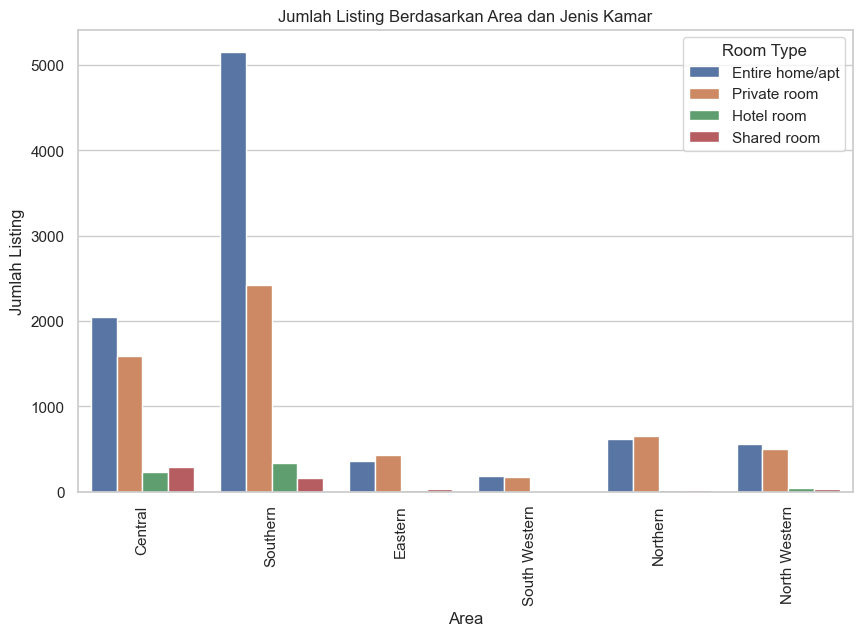

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Area', hue='room_type')
plt.xlabel('Area')
plt.ylabel('Jumlah Listing')
plt.title('Jumlah Listing Berdasarkan Area dan Jenis Kamar')
plt.legend(title='Room Type')
plt.xticks(rotation=90)
plt.show()

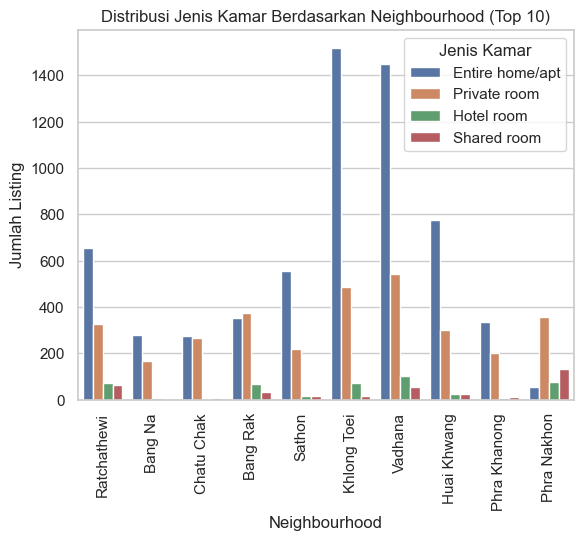

In [39]:
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

sns.countplot(data=df_top_neighbourhoods, x='neighbourhood', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.title('Distribusi Jenis Kamar Berdasarkan Neighbourhood (Top 10)')
plt.legend(title='Jenis Kamar')
plt.show()

Terdapat jumlah yang sangat signifikan dalam kamar jenis Entire home/apt khususnya di daerah Southern Bangkok dan Neighbourhood yang memiliki jumlah listing terbanyak juga masuk ke dalam wilayah Southern Bangkok. Penyewa lebih tertarik untuk menyewa dan menetap di daerah Southern Bangkok. Dimana penyewa menginginkan akses yang dekat dengan pantai, tempat wisata, pusat perbelanjaan, kelengkapan fasilitas dan sarana serta kemudahan transportasi.

## **Analisis Harga Tipe Kamar**

In [40]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    3465.591404
Hotel room         3032.983025
Private room       3066.661576
Shared room         919.757170
Name: price, dtype: float64

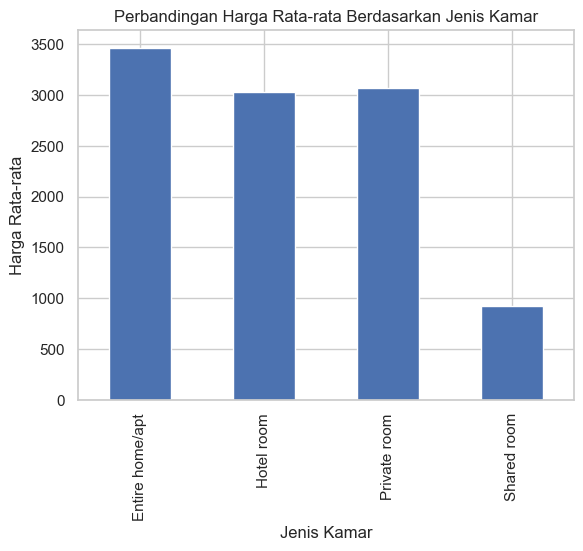

In [41]:
room_type_avg_price = df.groupby('room_type')['price'].mean()
room_type_avg_price.plot(kind='bar')
plt.xlabel('Jenis Kamar')
plt.ylabel('Harga Rata-rata')
plt.title('Perbandingan Harga Rata-rata Berdasarkan Jenis Kamar')
plt.show()

Penyewa cenderung tidak tertarik untuk menyewa Shared room dan lebih memilih Private room atau Hotel room untuk masa tinggal yang singkat. Hal ini terlihat dari grafik, di mana ketersediaan Private room jauh lebih banyak, dan Hotel room sedikit lebih banyak dibandingkan Shared room. Penyewa lebih memilih opsi lain meskipun harganya lebih tinggi, karena Shared room mengharuskan mereka berbagi kamar dengan penyewa lain, yang berarti kurangnya privasi dan fasilitas yang terbatas. Meskipun Shared room menawarkan harga yang lebih ekonomis, penyewa lebih memilih kamar dengan tingkat privasi yang lebih tinggi.

In [42]:
df.groupby('Area')['price'].mean()

Area
Central          3185.919036
Eastern          2231.463680
North Western    3857.052074
Northern         1985.504601
South Western    1681.013966
Southern         3514.517651
Name: price, dtype: float64

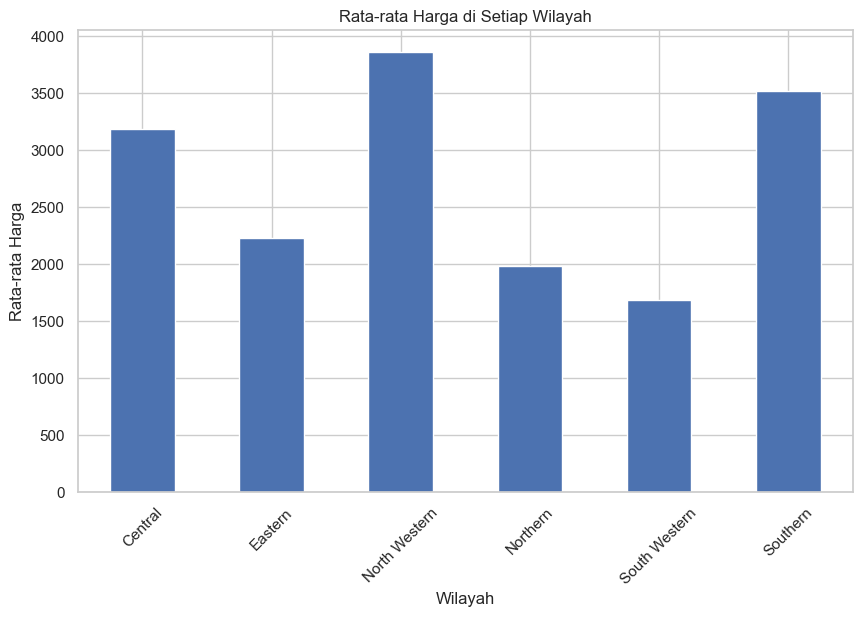

In [43]:
average_price_by_area = df.groupby('Area')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_area.plot(kind='bar')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga di Setiap Wilayah')
plt.xticks(rotation=45)
plt.show()

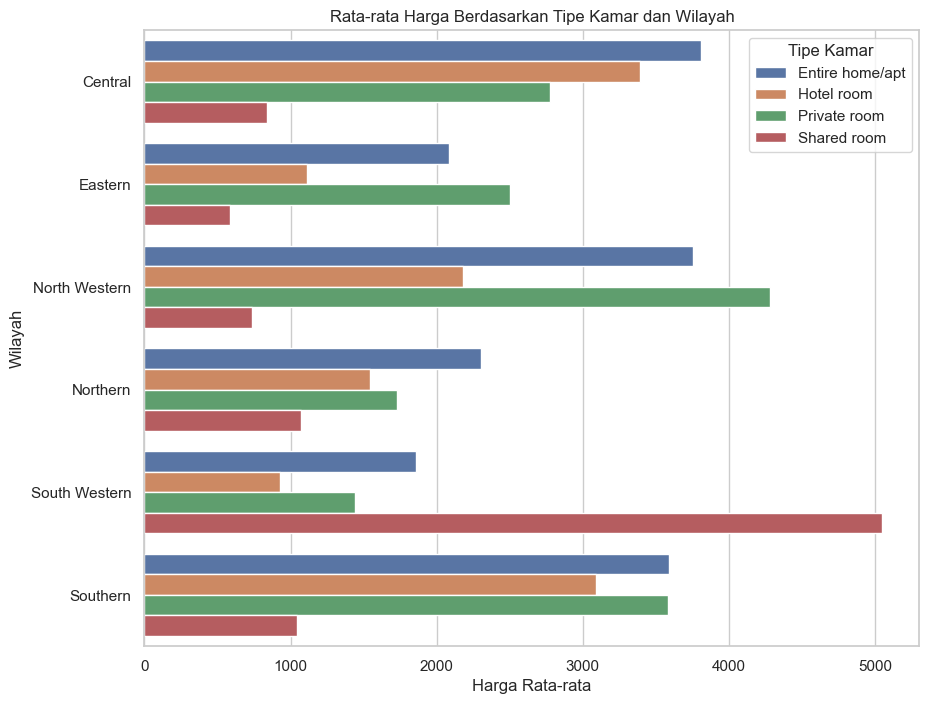

In [44]:
avg_price_by_room_area = df.groupby(['room_type', "Area"])['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_price_by_room_area, y="Area", x='price', hue='room_type', orient='h')
plt.ylabel('Wilayah')
plt.xlabel('Harga Rata-rata')
plt.title('Rata-rata Harga Berdasarkan Tipe Kamar dan Wilayah')
plt.legend(title='Tipe Kamar')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa setiap wilayah mempunyai harga rata - rata yang berbeda di keempat jenis kamar. Harga dari masing - masing listing juga bervariasi dari mulai yang paling rendah dan yang paling tinggi di setiap wilayah Bangkok. Ini memberikan penyewa preferensi untuk menginap dan tinggal sesuai budget penyewa.

## **Kesimpulan**

Dari analisis yang telah dilakukan kita dapat mengambil kesimpulan sebagai berikut :

- Wilayah Southern Bangkok memiliki jumlah listing yang tinggi dibandingkan dengan wilayah lain. Hal ini dapat disebabkan oleh keberadaan pusat bisnis, pusat perbelanjaan, perkantoran, dan akses transportasi yang mudah di wilayah tersebut. Sehingga banyak wisatawan yang berminat untuk menyewa di wilayah Central Bangkok.

- Wilayah Central Bangkok memiliki jumlah listing yang signifikan karena wilayah tersebut sebagai distrik hiburan dan wisatawan cenderung banyak ke wilayah ini.

- Wilayah Northern, Eastern, North dan South Western Bangkok mempunyai distribusi jenis listing yang berbeda beda dari yang terjangkau sampai yang paling mahal sekalipun.

- Berdasarkan jenis kamar, dapat disimpulkan bahwa "Entire home/apt" (Seluruh Rumah/Apartemen) menjadi pilihan yang populer bagi tamu yang mencari privasi dan kenyamanan seperti tinggal di rumah sendiri. dan Private room (Kamar Pribadi) juga menjadi pilihan yang banyak diminati, terutama bagi tamu yang menginginkan privasi tetapi tidak memerlukan ruang yang banyak.

- Harga rata-rata di setiap wilayah Bangkok bervariasi tergantung pada jenis kamar dan lokasinya. Wisatawan dapat memilih wilayah yang sesuai dengan preferensi mereka dan menyesuaikan anggaran akomodasi mereka dengan mempertimbangkan harga rata-rata di setiap wilayah dan jenis kamar yang mereka inginkan.

## **Rekomendasi**

Dari analisis diatas kita dapat membuat rekomendasi persebaran jenis listing dari masing - masing wilayah :

**1.  Wilayah Cental Bangkok :**

- Karena wilayah ini merupakan pusat kota dengan tingkat kepadatan yang tinggi dan aktivitas yang intens, maka disarankan untuk meningkatkan ketersediaan jenis kamar seperti Entire home/apt, Private room, dan Hotel room dengan rentang harga yang bervariasi. Ini memungkinkan pilihan lebih banyak bagi penyewa yang memiliki anggaran berbeda. Selain itu, sangat penting untuk memperhatikan lokasi kamar yang dekat dengan sarana transportasi seperti halte, stasiun, dan terminal bus. 

- Akses yang mudah ke transportasi umum akan sangat memudahkan penyewa, memperbesar peluang terjadinya pemesanan, dan menjadikan wilayah ini lebih menarik bagi para wisatawan maupun pekerja yang membutuhkan mobilitas tinggi.


**2. Wilayah Southern Bangkok:**

- Di wilayah selatan yang lebih dekat dengan pelabuhan dan kawasan industri, disarankan untuk fokus pada peningkatan kamar Private room dan Hotel room dengan harga yang lebih terjangkau. Pengaturan ini akan menarik bagi para pekerja yang datang dari luar kota atau wisatawan yang membutuhkan akomodasi praktis dengan harga yang lebih bersahabat. 

- Lokasi yang dekat dengan pusat industri dan area komersial akan sangat menguntungkan untuk memfasilitasi kebutuhan akomodasi bagi pekerja.


**3. Wilayah Northern Bangkok:**

- Wilayah utara yang cenderung lebih tenang dan memiliki banyak area perumahan serta taman kota akan lebih cocok untuk jenis kamar seperti Entire home/apt dan Private room. Fokus pada ruang tinggal jangka panjang atau untuk keluarga yang membutuhkan kenyamanan dan ruang lebih. 

- Peningkatan fasilitas keluarga serta lingkungan yang lebih hijau akan menjadi daya tarik tersendiri bagi penyewa yang mencari lingkungan yang lebih tenang.


**4. Wilayah Eastern Bangkok:**

- Wilayah timur cenderung memiliki kombinasi area residensial dan kawasan komersial. Di sini, jenis kamar yang direkomendasikan adalah Entire home/apt dan Private room, dengan fokus pada harga menengah ke atas. 

- Akses ke kawasan bisnis serta kedekatannya dengan pusat perbelanjaan dan hiburan menjadikan wilayah ini ideal untuk wisatawan bisnis atau keluarga yang mencari kenyamanan dengan akses yang mudah ke berbagai fasilitas.


**5. Wilayah North Western Bangkok:**

- Wilayah barat laut cenderung lebih sepi dan jauh dari pusat kota, namun dengan peningkatan infrastruktur dan sarana transportasi, wilayah ini dapat menjadi pilihan yang lebih terjangkau bagi penyewa yang mencari akomodasi jangka panjang. Oleh karena itu, meningkatkan ketersediaan Entire home/apt dengan harga lebih rendah akan menarik bagi penyewa yang lebih fokus pada kedamaian dan lingkungan yang lebih terisolasi.
    

**6. Wilayah South Western Bangkok:**

- Wilayah barat daya Bangkok menawarkan kombinasi antara area perumahan dan kawasan komersial, cocok untuk pengembangan Private room dan Entire home/apt. 

- Fokus pada harga yang lebih rendah akan menarik penyewa yang mencari tempat tinggal lebih terjangkau namun tetap dengan fasilitas yang cukup. Ketersediaan dekat dengan area perbelanjaan dan ruang hijau juga akan meningkatkan daya tarik wilayah ini.

Harga setiap unit yang akan dibangun sebaiknya disesuaikan dengan lokasi, karakteristik wilayah, dan fasilitas yang ada. Jika unit tersebut terletak di lokasi yang jauh dari akses utama, maka sebaiknya diberi harga yang lebih terjangkau (menengah ke bawah). Sebaliknya, untuk unit yang memiliki fasilitas seperti kemudahan akses transportasi, berada di pusat kota, serta menawarkan fasilitas penting lainnya yang memudahkan penyewa, dapat dipertimbangkan untuk diberikan harga lebih tinggi (menengah ke atas).

Selain itu, Airbnb juga dapat mempertimbangkan untuk membuat promosi atau kampanye terkait pendaftaran listing. Ini bertujuan untuk menarik lebih banyak pemilik properti untuk bergabung, sehingga dapat memperluas pilihan bagi penyewa dan meningkatkan jumlah listing yang tersedia.

